# <u>**King County House Sales dataset prediction**</u>

## **Dataset Overview – King County House Sales**
This dataset includes house sales data from King County, Washington, which includes Seattle. It contains detailed information about houses sold between May 2014 and May 2015.

## **Problems / Challenges**
## Uncertainty in Property Pricing

Homeowners and real estate agencies often struggle to accurately price a property based on its features.

Market prices fluctuate, and it’s unclear which characteristics most heavily influence a home's value.

## Lack of Data-Driven Insight on Renovations

Homeowners may not know whether renovating a house actually increases its value, or by how much.

There’s no clear way to quantify the impact of renovation on property prices without deeper analysis.

## Complex Relationships Between Features

House price is influenced by a combination of many factors: size, location, condition, age, and more.

It’s difficult to determine which features matter most or interact in non-obvious ways.

## Geographic Variability

Property prices vary across neighborhoods, but raw zip code data is not directly informative without analysis.



# **Objectives**
## Build a Predictive Model for House Prices

Use linear regression to build a model that predicts the sale price of a house based on its characteristics.

Evaluate model performance and identify which features most influence price.

## Analyze the Effect of Renovation

Investigate whether renovated houses sell for more than non-renovated ones, controlling for other variables.

Provide a data-driven estimate of the added value renovations bring.

## Generate Actionable Insights for Stakeholders

Help real estate agencies set fair and competitive listing prices.

Help homeowners decide whether renovating their property is financially worthwhile before selling.

## Understand Feature Impact

Quantify the influence of features like sqft_living, grade, location, and condition on sale price.

Help stakeholders prioritize improvements that give the best return on investment.

## Support Decision-Making with Visualization

Use EDA visualizations to uncover trends and clearly communicate insights.

Support findings with visual evidence to make them easy to interpret for non-technical users.

## **DATA UNDERSTANDING**

# **Step 1 - Load and Inspect the Data**

In [75]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [76]:
#Loading the dataset
df=pd.read_csv("kc_house_data.csv")

In [77]:
#Checking the data head
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [78]:
#Checking the data tail
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


From the inspection of the first and the last few rows we can already observe there are columns with missing values eg Waterfront

In [79]:
#Checking the data shape
df.shape

(21597, 21)

From the above the dataset contains 21,597 rows and 21 columns

In [80]:
#Checking the data size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset contains 21,597 real estate records across 21 features, primarily numeric. Most columns are complete, but a few (like waterfront, view, and yr_renovated) have missing values. Notably, sqft_basement is incorrectly typed as an object and may need conversion to numeric for analysis. Overall, the data is well-structured for modeling housing prices.

In [81]:
#Discriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The dataset reveals a wide range of home prices, with most homes having 3–4 bedrooms and around 2,080 sqft of living space. Renovations are relatively rare but may add value. Key price drivers include size, location, and premium features like waterfront views, which are uncommon and likely boost home value significantly.

In [82]:
df.sort_values("price", ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1.0,NaN,...,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,...,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,...,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1.0,4.0,...,12,6350,290.0,2004,0.0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0.0,0.0,...,12,6430,0.0,2001,0.0,98004,47.6208,-122.219,3720,14592


In [83]:
df.sort_values("price", ascending=False).tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13743,1788900230,7/22/2014,86500.0,3,1.00,840,9480,1.0,0.0,0.0,...,6,840,0.0,1960,0.0,98023,47.3277,-122.341,840,9420
16700,1322049150,3/5/2015,85000.0,2,1.00,910,9753,1.0,0.0,0.0,...,5,910,0.0,1947,0.0,98032,47.3897,-122.236,1160,7405
10242,2422049104,9/15/2014,85000.0,2,1.00,830,9000,1.0,0.0,0.0,...,6,830,0.0,1939,0.0,98032,47.3813,-122.243,1160,7680
3763,1523049188,4/30/2015,84000.0,2,1.00,700,20130,1.0,0.0,0.0,...,6,700,0.0,1949,0.0,98168,47.4752,-122.271,1490,18630
18453,7999600180,5/29/2014,83000.0,2,1.00,900,8580,1.0,0.0,0.0,...,5,900,0.0,1918,0.0,98168,47.4727,-122.270,2060,6533
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,...,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,...,5,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387


Based on the above sort by price, it is evidence that the there is a relatively big variance between the highest and the lowest house price of about 7.6 Million.

In [84]:
#Checking for the missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [85]:
df.isnull().sum()/df.shape[0]*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

The dataset is largely complete, with most features having 0% missing values. However, waterfront (11%), view (0.29%), and yr_renovated (17.79%) contain missing data and may require imputation or exclusion depending on the analysis needs. Overall, data quality is strong and ready for preprocessing.

In [86]:
#Finding the dublicates values
df.duplicated().sum()

np.int64(0)

There is no duplicate values in the dataset

In [87]:
#Identifying gabage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*5)

date
6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
2/15/2015       1
5/15/2015       1
11/2/2014       1
11/30/2014      1
7/27/2014       1
Name: count, Length: 372, dtype: int64
***************
sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
176.0         1
225.0         1
1275.0        1
266.0         1
283.0         1
Name: count, Length: 304, dtype: int64
***************


The sqft_basement column contains mostly numeric values, but includes 454 entries marked with '?', indicating missing or invalid data. These should be cleaned or converted to maintain data consistency. The majority of entries (12,826) report a basement size of 0.0, suggesting many homes may not have a basement.

# **DATA CLEANING AND PREPROCESSING**

## **step 1 : Handling missing Values**

We will be handling missing values by dropping rows with missing values for column waterfront and view. For column yr renovated we will impute the missing values with value '0'

In [88]:
df = df.dropna(subset=['waterfront', 'view'])

Checking unique values for column yr_renovated

In [89]:
df['yr_renovated'].unique()

array([1991.,   nan,    0., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1945.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 2008., 2012.,
       1968., 1963., 1951., 1962., 1953., 1993., 1955., 1996., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1965., 1967., 1934., 1972., 1944., 1958., 1974.])

From above the yr_renovated column is in float formated and also contains NaN values, therefore we will impute the NaN and convert the values fron floats to Integers.

In [90]:
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)
df['yr_renovated'] = df['yr_renovated'].astype('Int64')  # capital I

In [92]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

Reinspecting by checking unique values to make sure missing values values has been handled and data type conversion has been effected.

In [94]:
df['yr_renovated'].unique()

<IntegerArray>
[1991,    0, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984, 1954, 2014,
 2011, 1983, 1990, 1988, 1977, 1981, 1995, 2000, 1999, 1998, 1970, 1989, 2004,
 1986, 2007, 1987, 2006, 1985, 2001, 1980, 1971, 1945, 1979, 1997, 1950, 1969,
 1948, 2009, 2015, 2008, 2012, 1968, 1963, 1951, 1962, 1953, 1993, 1955, 1996,
 1982, 1956, 1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1965, 1967,
 1934, 1972, 1944, 1958, 1974]
Length: 70, dtype: Int64

From above the year has been converted into integer and the missing values have been imputed

In [93]:
#Create a renovated binary feature: 1 if yr_renovated > 0, else 0.
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

## **Step 2 - Data type conversion**

In [51]:
#Convert date to a proper datetime format.
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [95]:
# Convert 'sqft_basement' to numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [17]:
#Confirming
df[['yr_renovated', 'renovated']].head(10)

,yr_renovated,renovated
0,0.0,0
1,1991.0,1
2,NaN,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,0.0,0
9,0.0,0


1 means the house was renovated (i.e., yr_renovated > 0)

0 means the house was never renovated

In [18]:
#Droping the missing values
df = df.dropna()

In [19]:
#Inspecting the dataset after droping the missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

All columns have zero missing values, indicating the dataset is fully cleaned and ready for analysis or modeling without requiring additional data imputation or preprocessing.

# **Step 3 - Exploratory Data Analysis (EDA)**

In [20]:
#Displaying the columns in the dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

In [21]:
# Define numeric columns
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated']

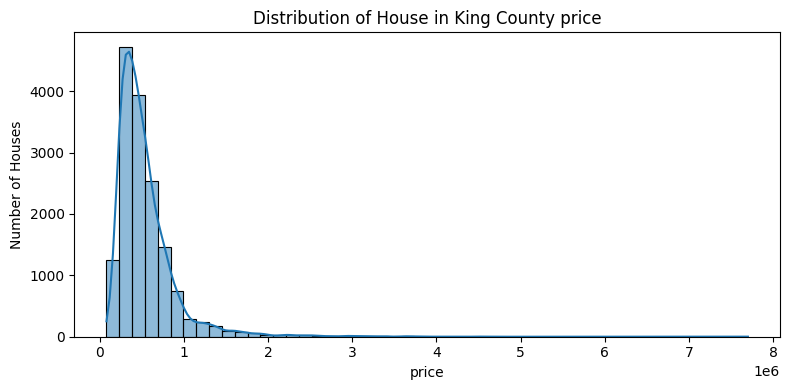

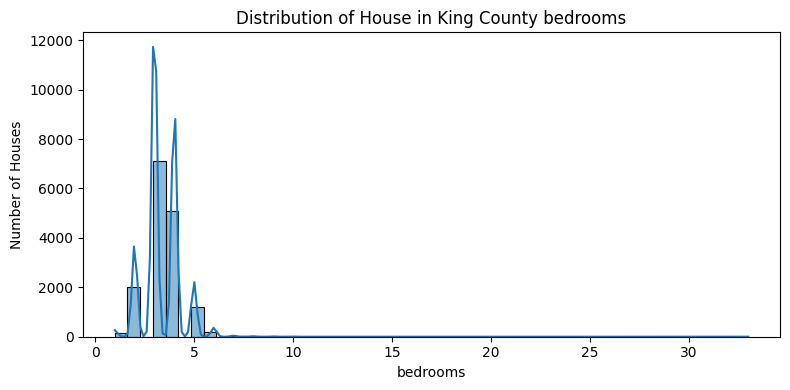

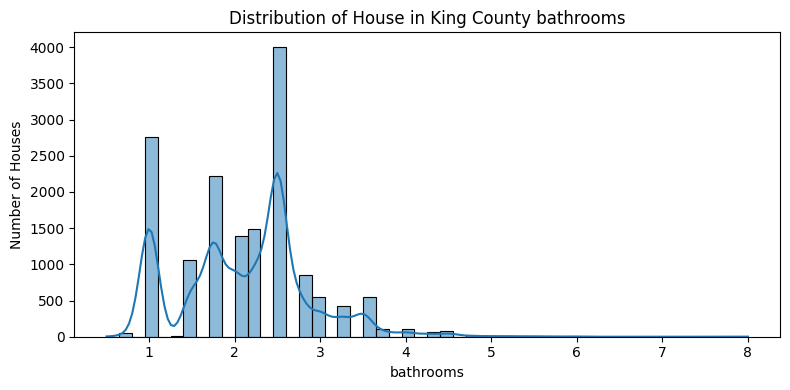

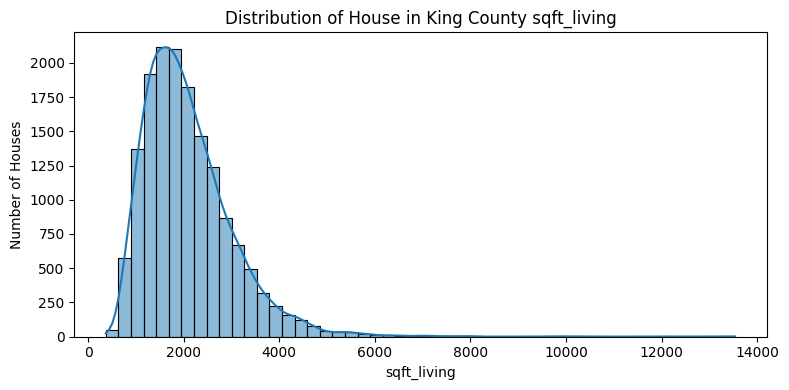

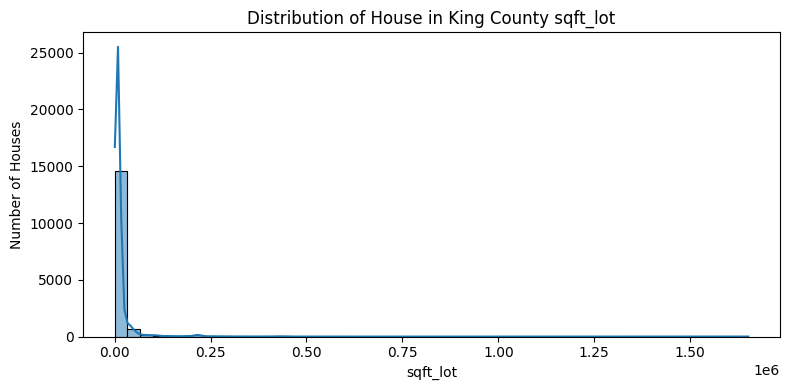

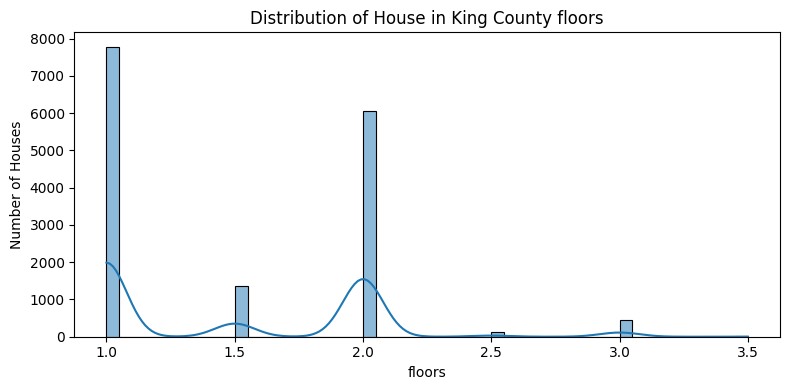

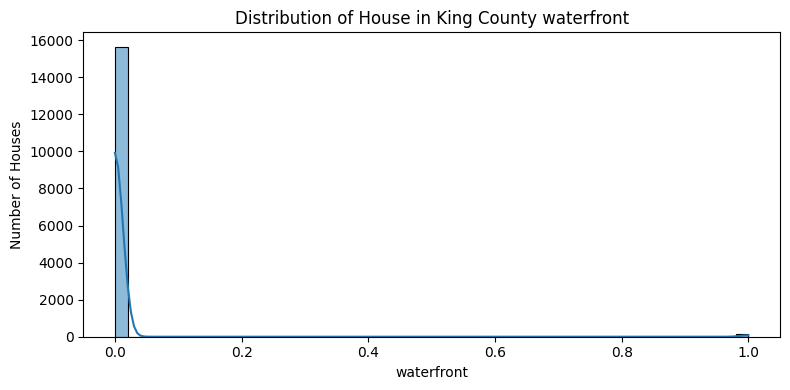

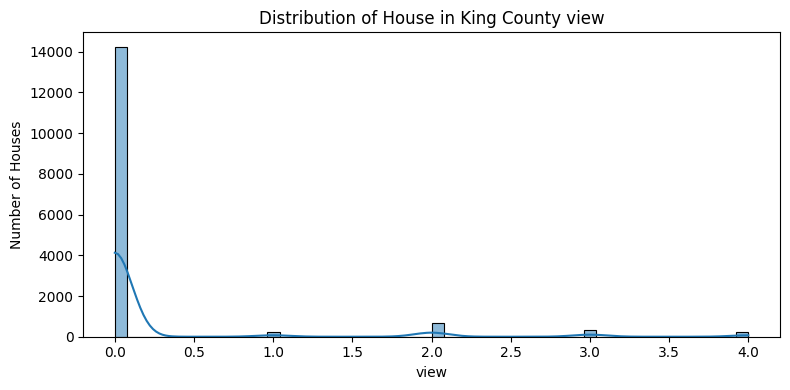

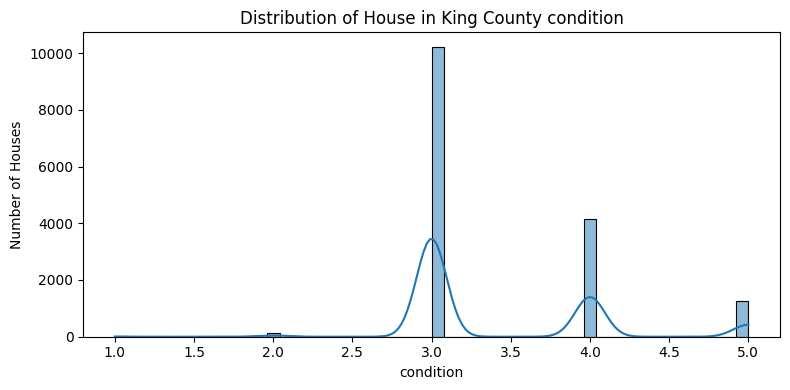

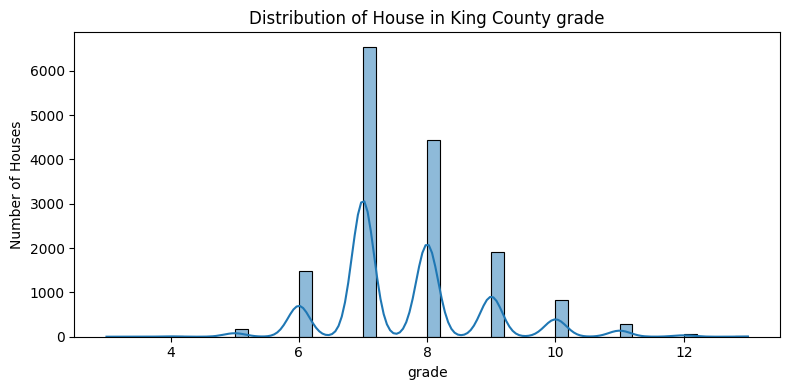

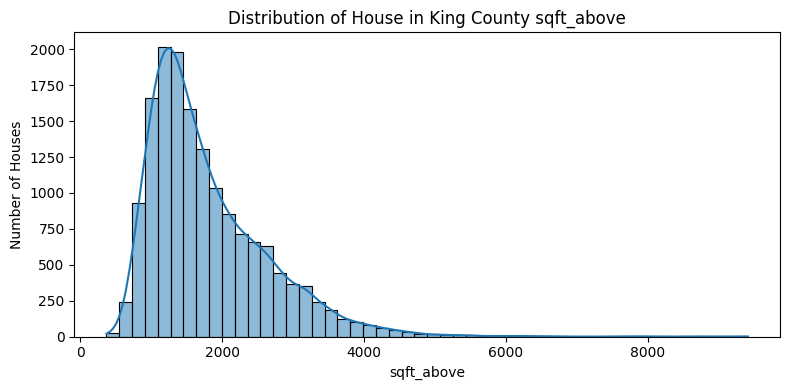

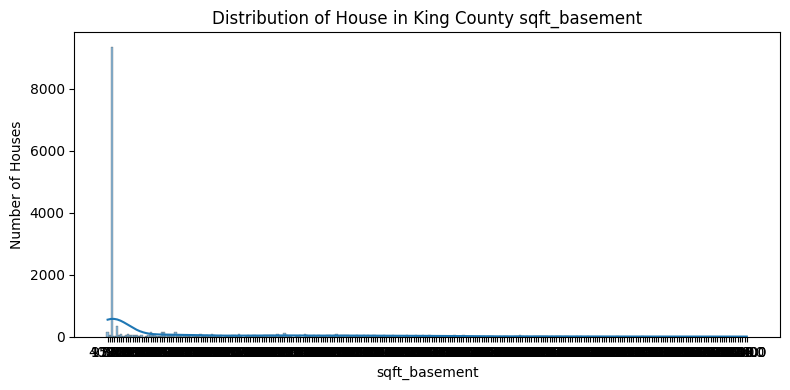

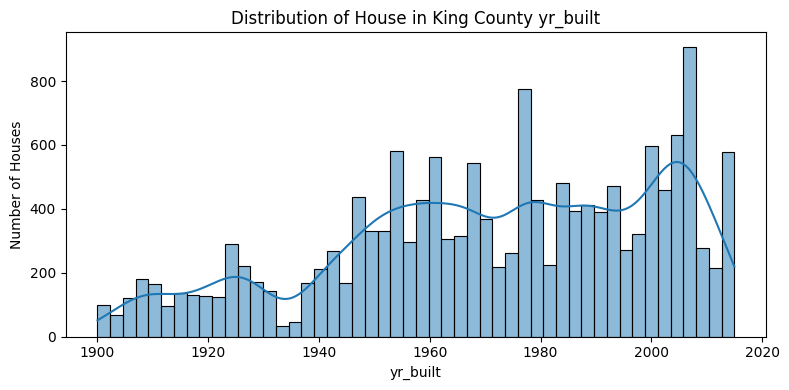

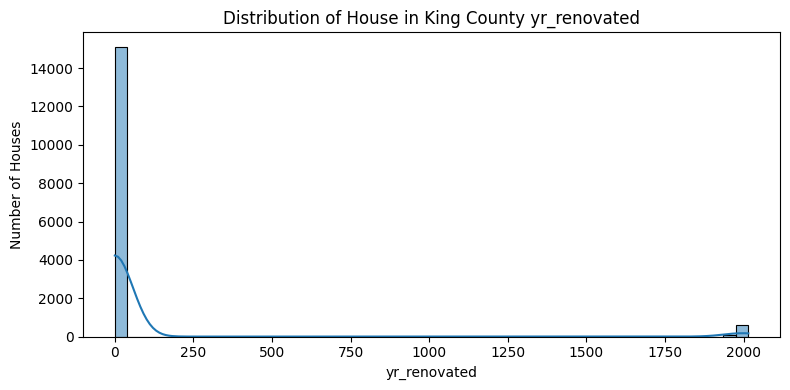

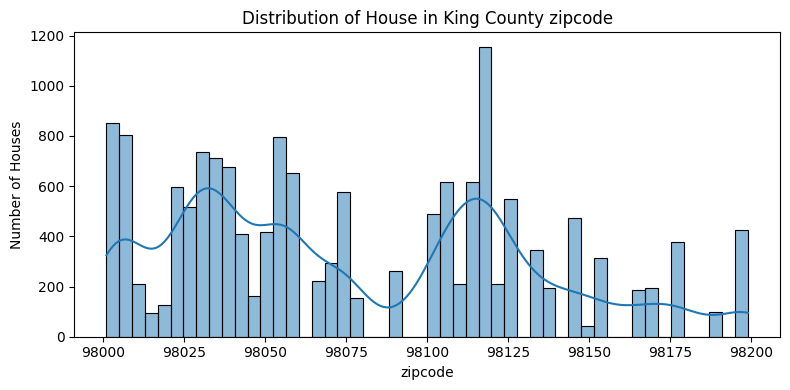

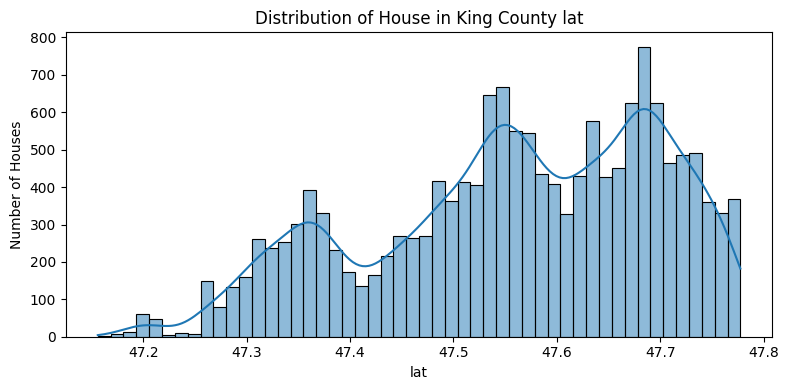

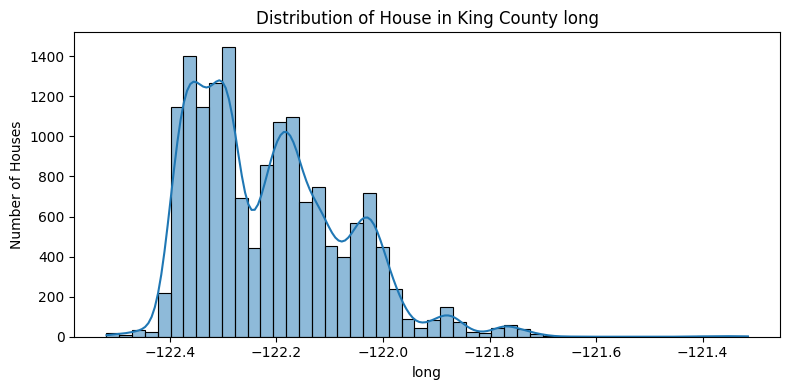

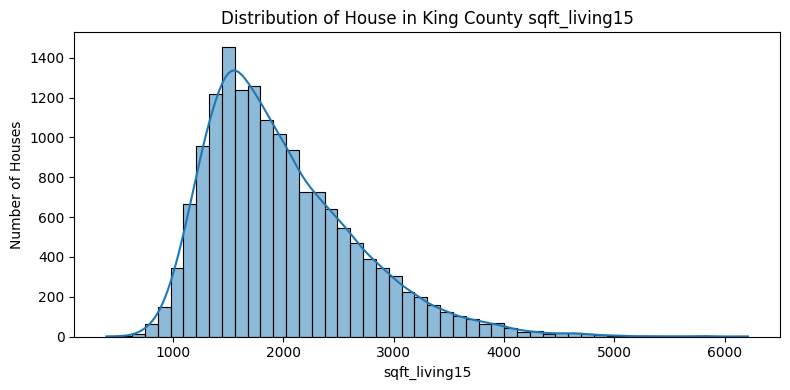

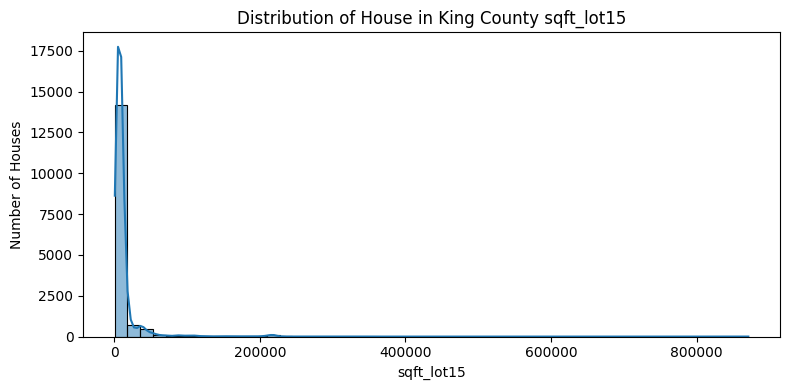

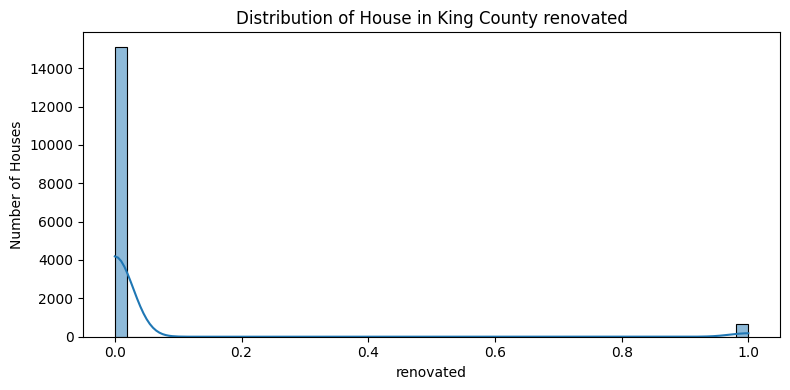

In [22]:
# Plot histograms using Seaborn
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of House in King County {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Houses')
    plt.tight_layout()
    plt.show()

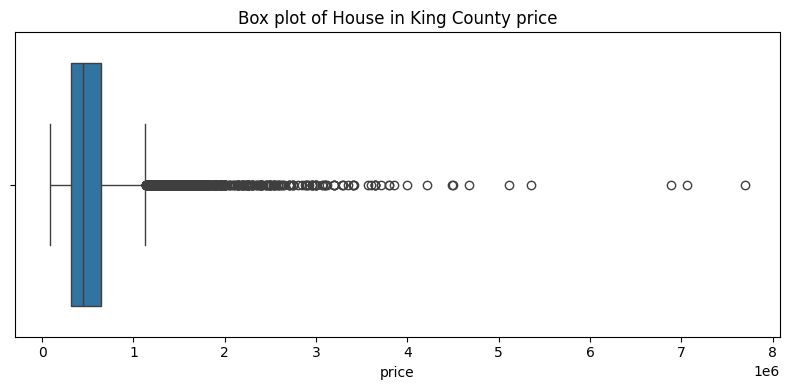

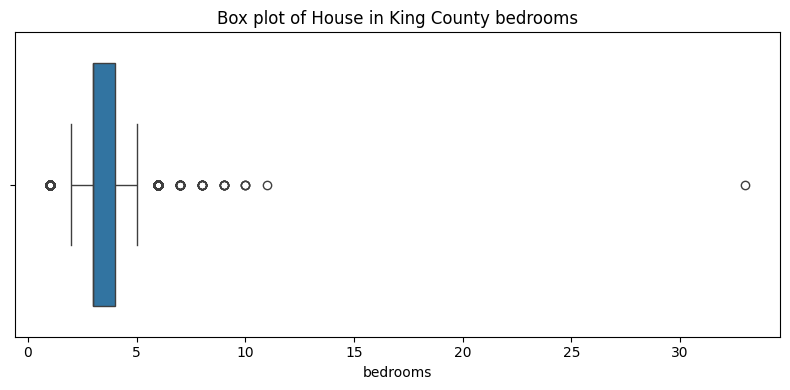

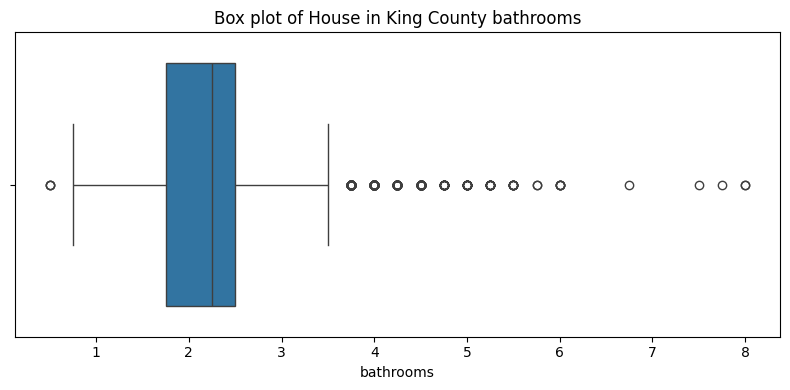

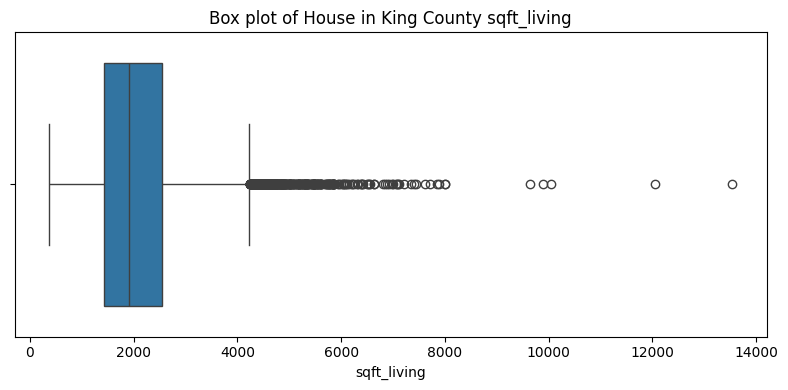

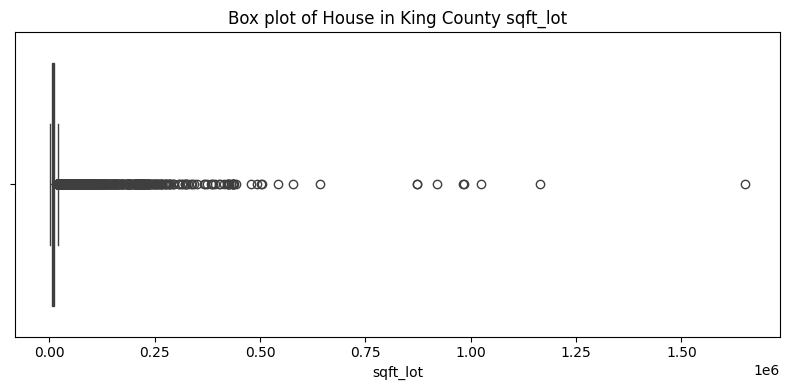

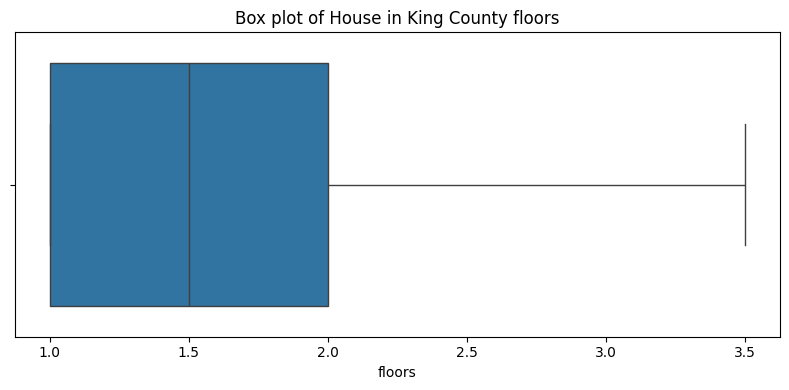

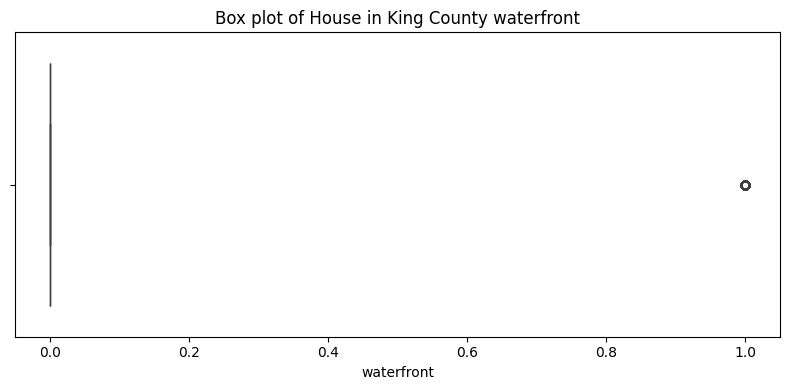

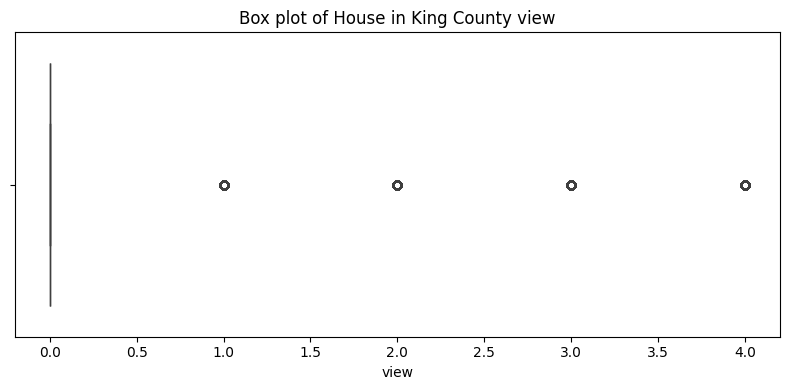

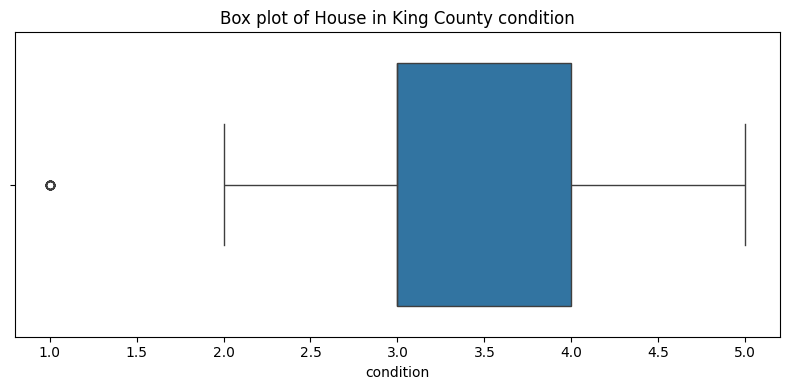

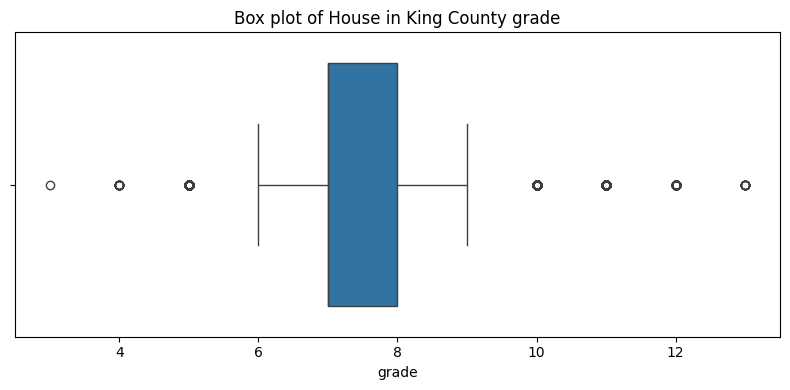

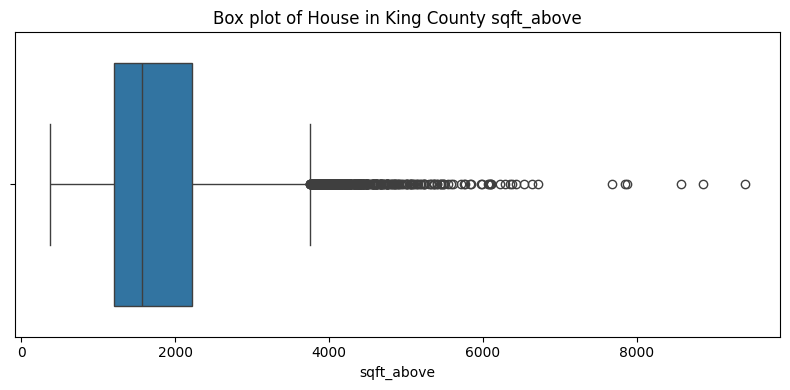

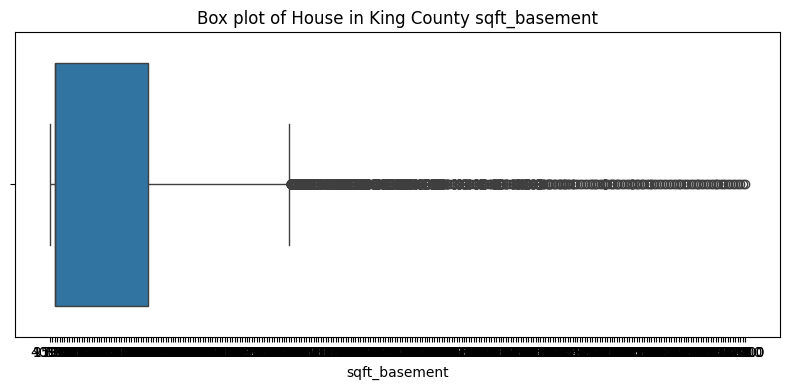

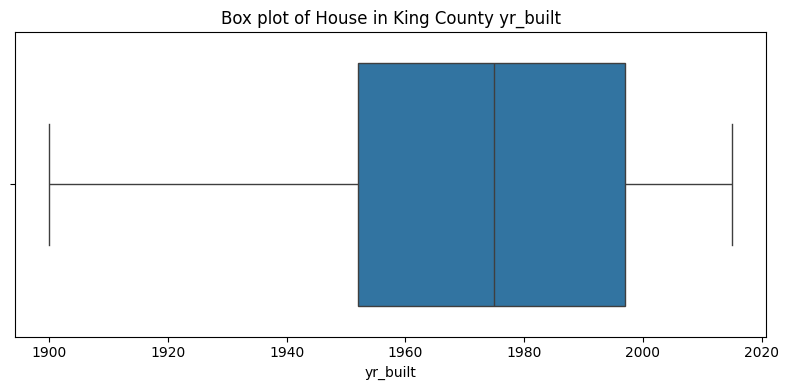

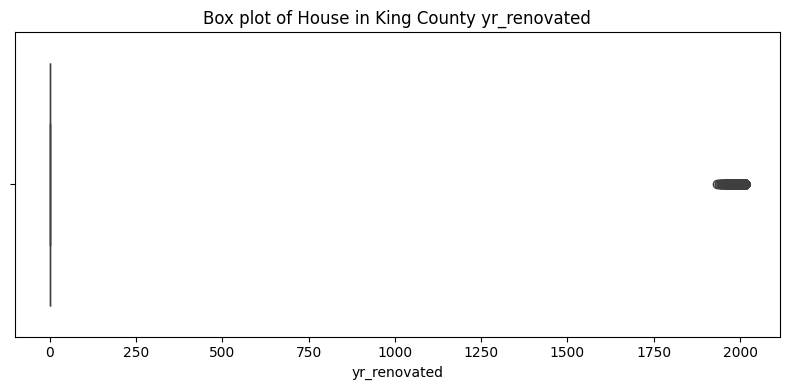

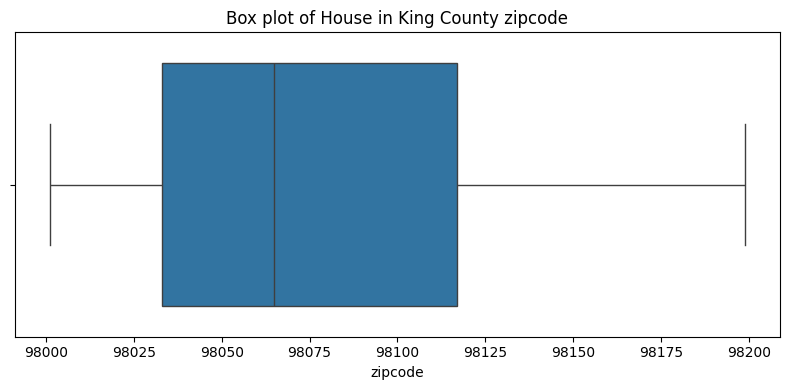

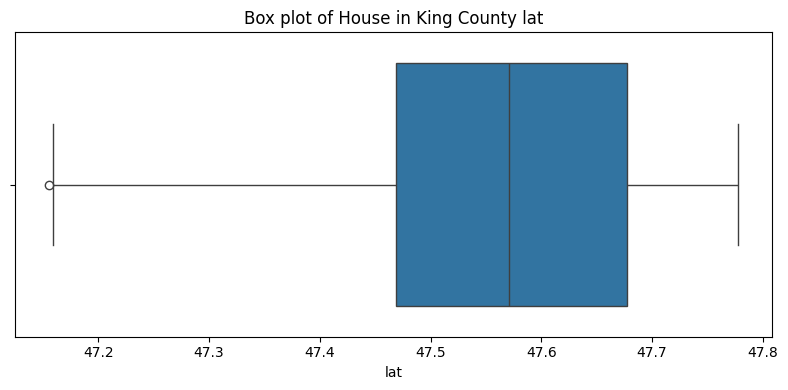

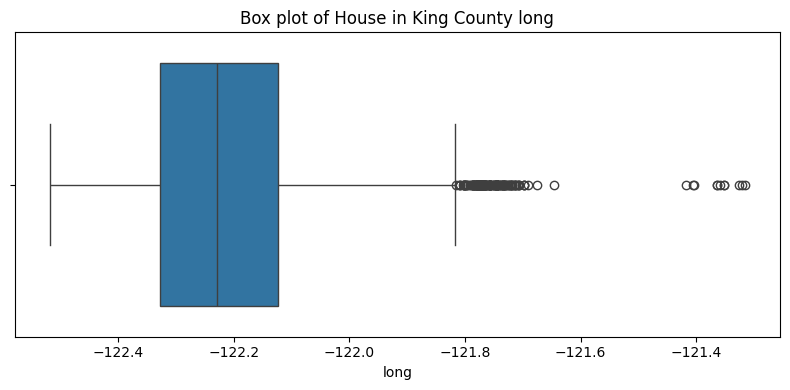

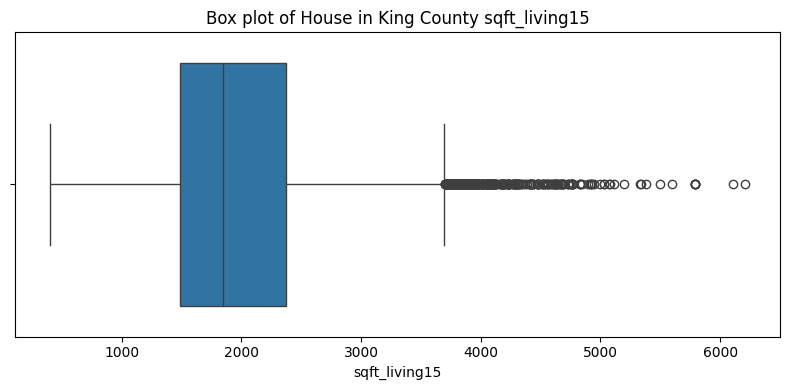

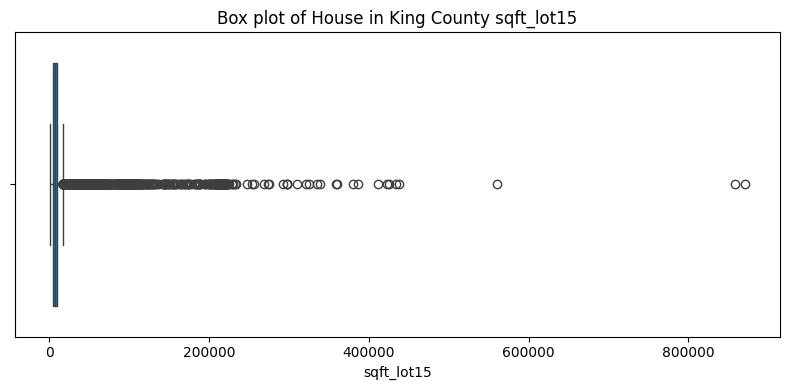

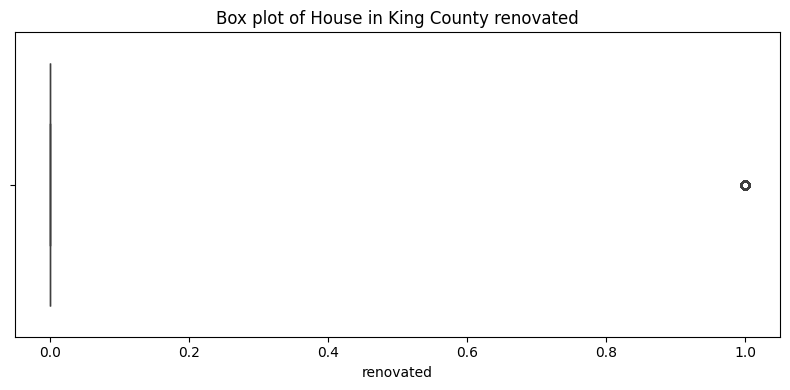

In [23]:
#Using Boxplot to identify any outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of House in King County {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

<Axes: >

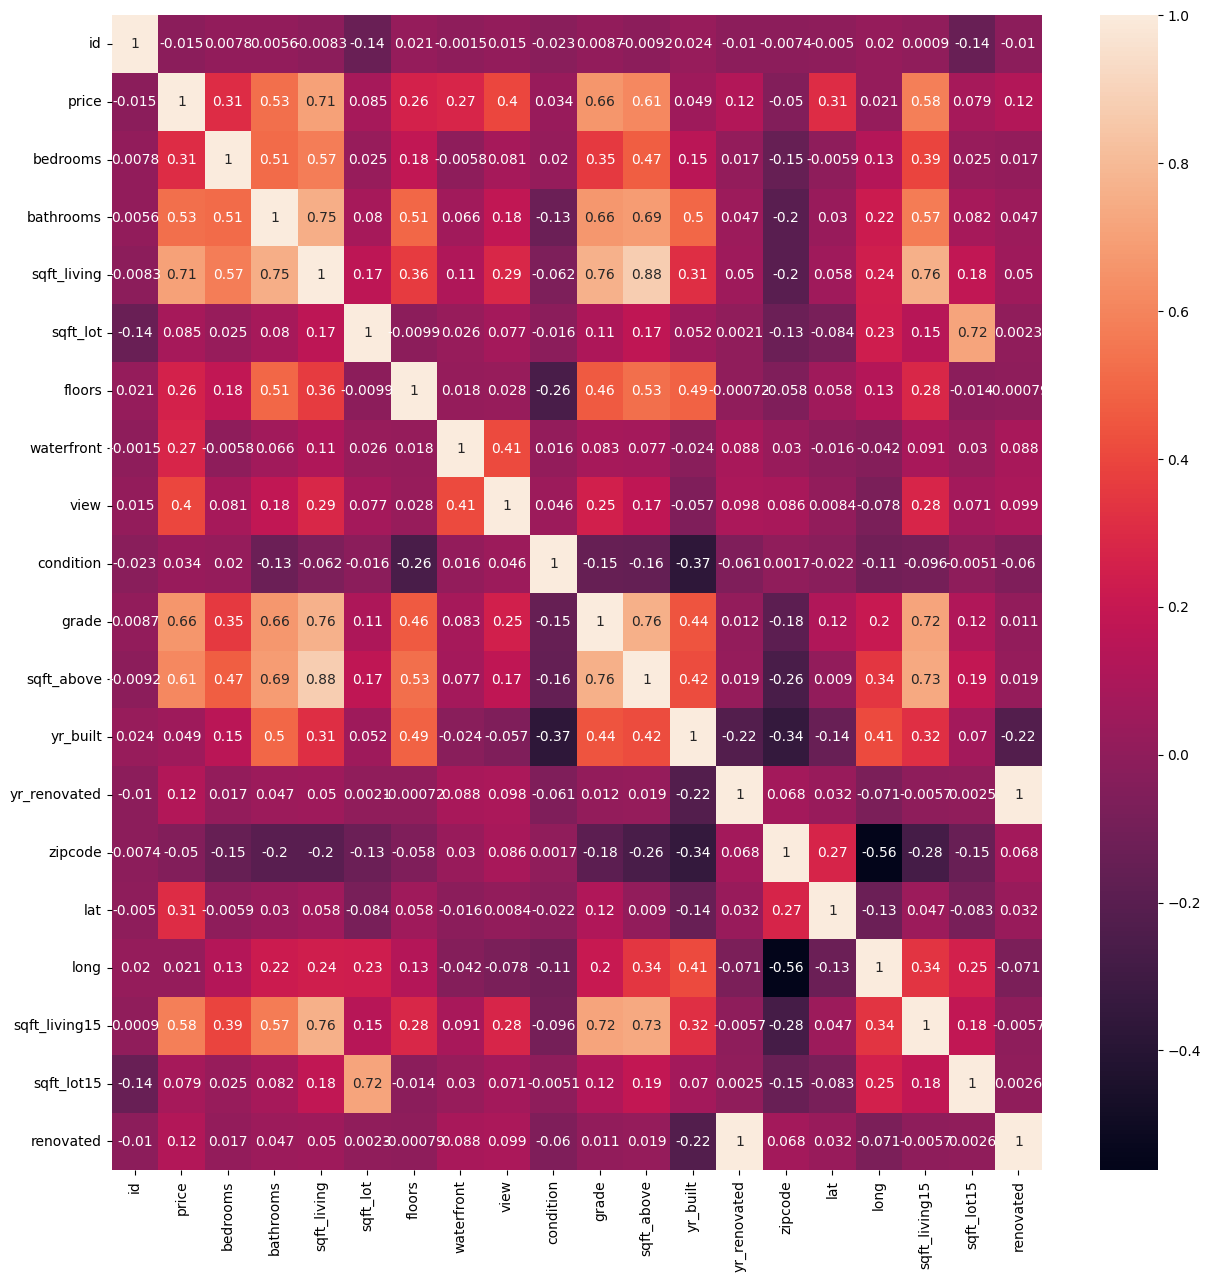

In [24]:
#Explore correlations between features and price using heatmaps.
y=df.select_dtypes(include="number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(y,annot=True)

The correlation heatmap shows that price is most strongly correlated with:

sqft_living (0.70)

grade (0.67)

sqft_above (0.61)

bathrooms (0.53)

view (0.40)

waterfront (0.41)

These features have the highest positive influence on price. On the other hand, features like zipcode, condition, and yr_built show weak or negative correlations, suggesting they have less direct impact on house pricing.

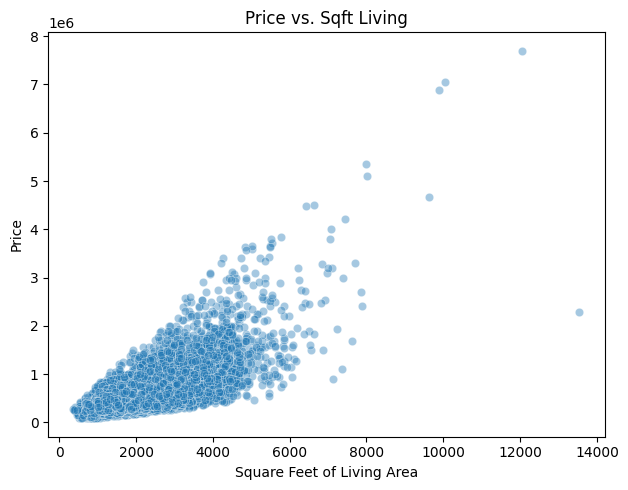

In [25]:
# Scatter plot: Price vs. sqft_living
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.4)
plt.title("Price vs. Sqft Living")
plt.xlabel("Square Feet of Living Area")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

There appears to be a positive correlation between the square footage of living area and the price. Generally, as the square footage of the living area increases, the price of the property also tends to increase.

Key Observations:

The majority of the data points are clustered in the lower square footage range, indicating a larger number of smaller homes.
As the square footage increases, the spread of prices also seems to widen, suggesting that other factors besides just size influence the price of larger homes.
There are some outliers, particularly a few very large homes with significantly higher prices.
In simpler terms: Bigger houses tend to cost more, but the price variation is greater for larger properties, implying other features play a more significant role in their valuation

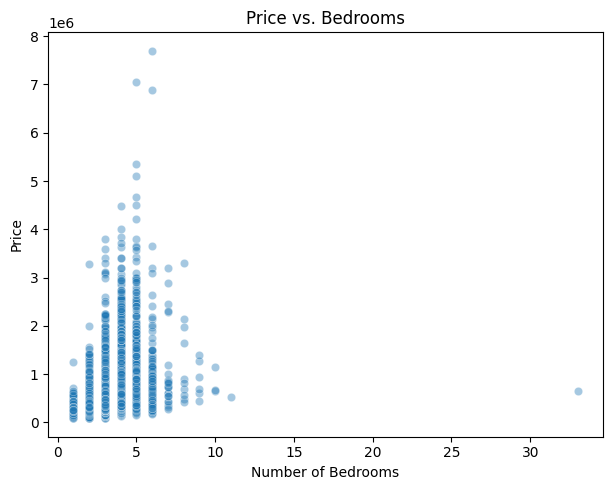

In [26]:
# Scatter plot: Price vs. Bedrooms
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
sns.scatterplot(x='bedrooms', y='price', data=df, alpha=0.4)
plt.title("Price vs. Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

Generally, the price tends to increase with the number of bedrooms, but this relationship isn't strictly linear and shows significant variability.

Key Observations:

Most properties have between 2 and 5 bedrooms, forming a dense cluster.
Within this cluster, there's a wide range of prices for the same number of bedrooms, indicating other factors strongly influence price.
There are fewer data points for properties with a very high number of bedrooms (e.g., 10+), and these don't necessarily command the absolute highest prices.
There's a notable outlier with a very high number of bedrooms (around 33) and a relatively low price compared to some properties with fewer bedrooms.
In simpler terms: More bedrooms can mean a higher price, but it's not the only, or always the most important, factor determining the cost of a home. Other features and market conditions play a significant role.

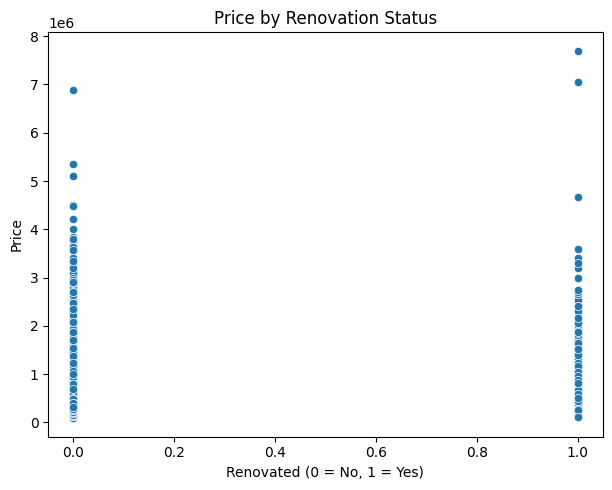

In [30]:
# Scatter plot: Renovation vs. Price
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
sns.scatterplot(x='renovated', y='price', data=df)
plt.title("Price by Renovation Status")
plt.xlabel("Renovated (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

The plot suggests that renovated properties (represented by 1 on the x-axis) tend to have a wider range of prices, including some of the highest priced properties in the dataset. Non-renovated properties (represented by 0) also show a considerable range in price, but the very highest price points appear to be associated with renovated homes in this visualization. However, there are also many non-renovated homes with prices comparable to, and even exceeding, some renovated ones. This indicates that while renovation might be a factor influencing price, it's not the sole determinant, and other variables play a significant role.

In [31]:
# Descriptive statistics comparison
price_comparison = df.groupby('renovated')['price'].describe()
print("Price Comparison (Descriptive Stats):")
print(price_comparison)

Price Comparison (Descriptive Stats):
             count           mean            std       min       25%  \
renovated                                                              
0          15111.0  531858.488187  353400.019983   82000.0  320000.0   
1            651.0  760872.056836  637150.637702  110000.0  410000.0   

                50%       75%        max  
renovated                                 
0          449000.0  633000.0  6890000.0  
1          600000.0  886250.0  7700000.0  


Houses that have been renovated tend to be significantly more expensive than non-renovated ones. The mean price for renovated homes is about $761K, compared to $532K for non-renovated. Renovated homes also have a higher median, 75th percentile, and maximum price, indicating a clear positive impact of renovation on home value.

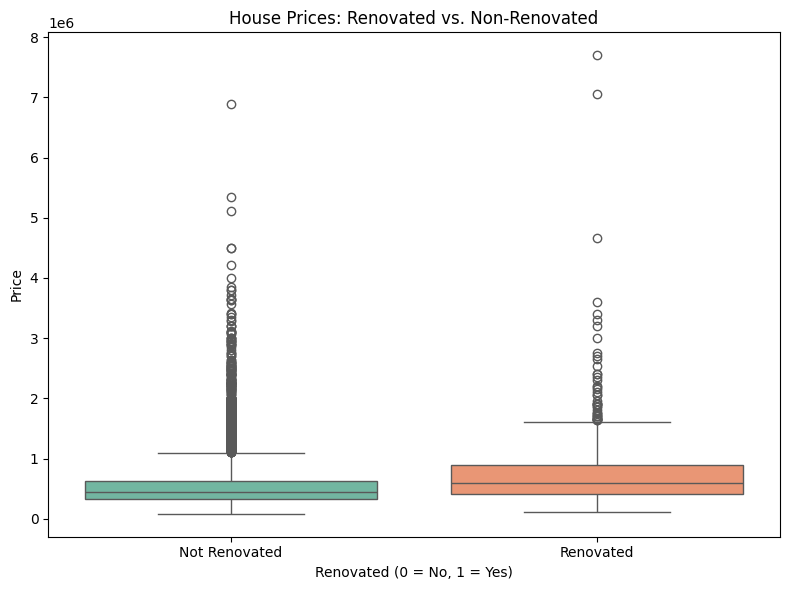

In [32]:
# Boxplot visualization House Prices: Renovated vs. Non-Renovated
plt.figure(figsize=(8, 6))
sns.boxplot(x='renovated', y='price', data=df, palette='Set2')
plt.title("House Prices: Renovated vs. Non-Renovated")
plt.xlabel("Renovated (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.xticks([0, 1], ['Not Renovated', 'Renovated'])
plt.tight_layout()
plt.show()

Renovated houses tend to have a higher median price compared to non-renovated houses, but there's a significant overlap in their price distributions, and both categories contain a wide range of values, including outliers at the higher end.

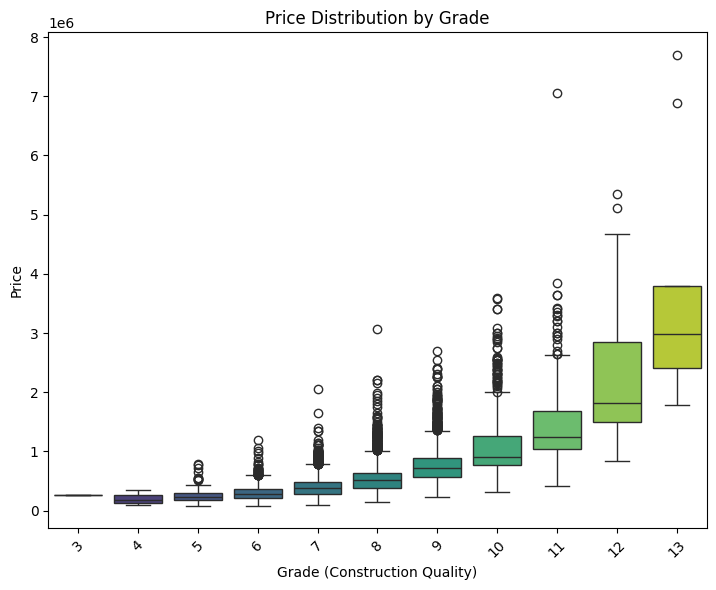

In [33]:
# Box plot: Price by Grade
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='grade', y='price', data=df, palette='viridis')
plt.title("Price Distribution by Grade")
plt.xlabel("Grade (Construction Quality)")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There's a clear positive correlation between the construction grade and the price. As the grade (construction quality) increases, the median price of the properties also significantly increases, with a wider range of higher-priced properties observed for higher grades.

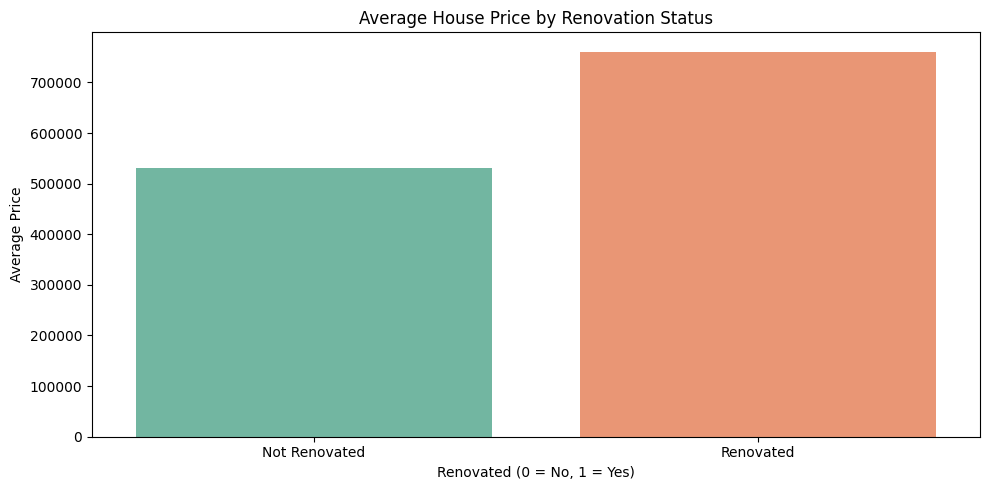

In [34]:
#Grouped bar plots Mean price by renovation Status
plt.figure(figsize=(10, 5))
renovation_avg = df.groupby('renovated')['price'].mean().reset_index()
sns.barplot(x='renovated', y='price', data=renovation_avg, palette='Set2')
plt.title("Average House Price by Renovation Status")
plt.xlabel("Renovated (0 = No, 1 = Yes)")
plt.ylabel("Average Price")
plt.xticks([0, 1], ['Not Renovated', 'Renovated'])
plt.tight_layout()
plt.show()

On average, renovated houses have a notably higher price than non-renovated houses.

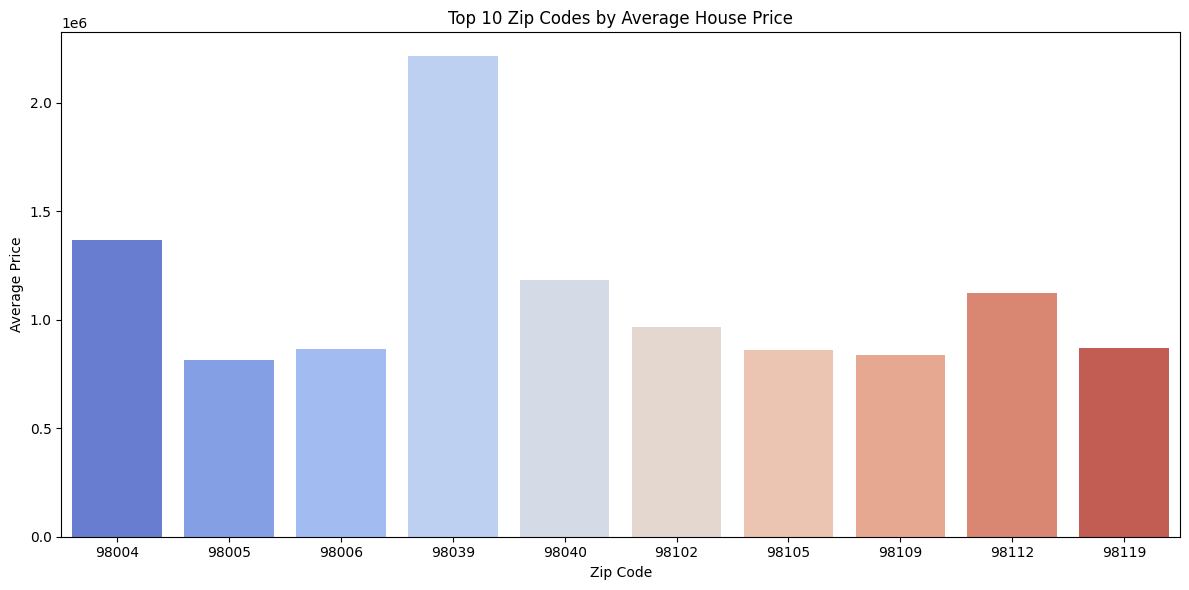

In [35]:
#Grouped bar plots Mean price by Top 10 Zipcodes
top_zipcodes = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='zipcode', y='price', data=top_zipcodes, palette='coolwarm')
plt.title("Top 10 Zip Codes by Average House Price")
plt.xlabel("Zip Code")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

There is significant variation in average house prices across the top 10 zip codes. Zip code 98039 has the highest average house price, substantially exceeding the averages in the other top zip codes. The remaining zip codes show a more moderate and varied range of average prices.

# **Step 4 - Outliers treatment**

In [39]:
col = ['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 
          'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated']

In [40]:
def remove_outliers_iqr(df, columns, factor=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

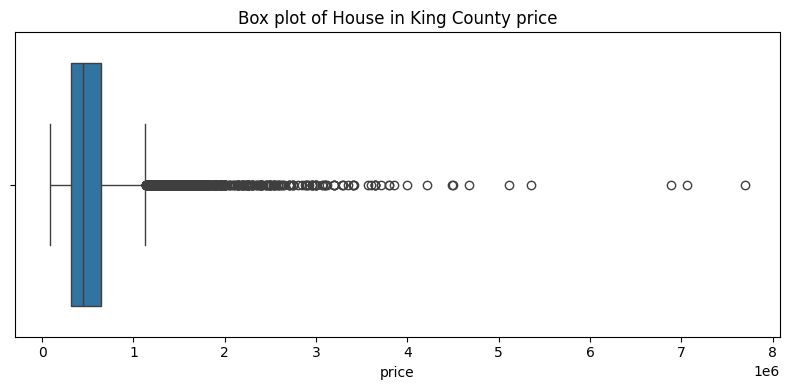

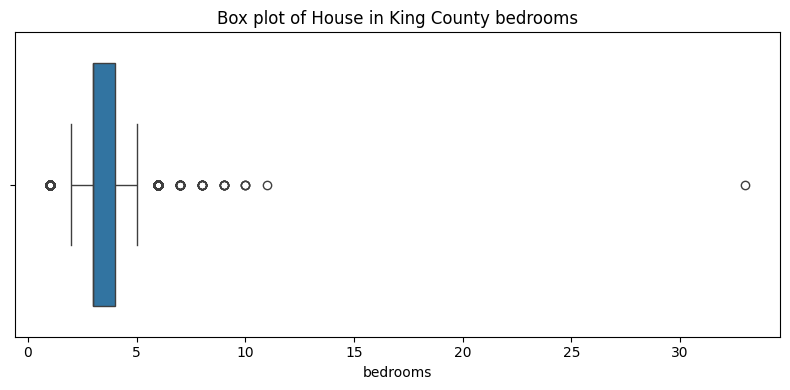

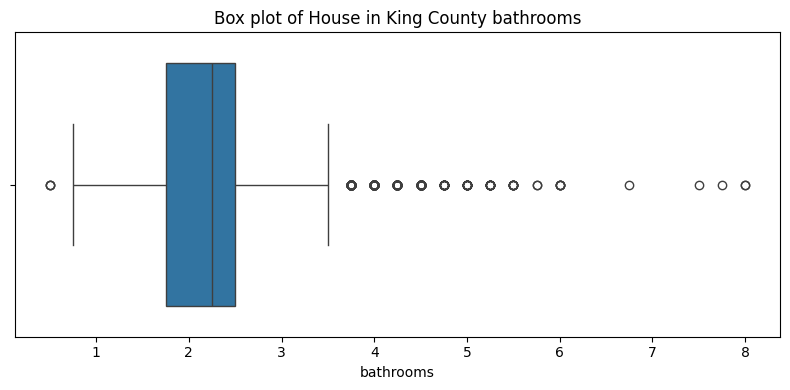

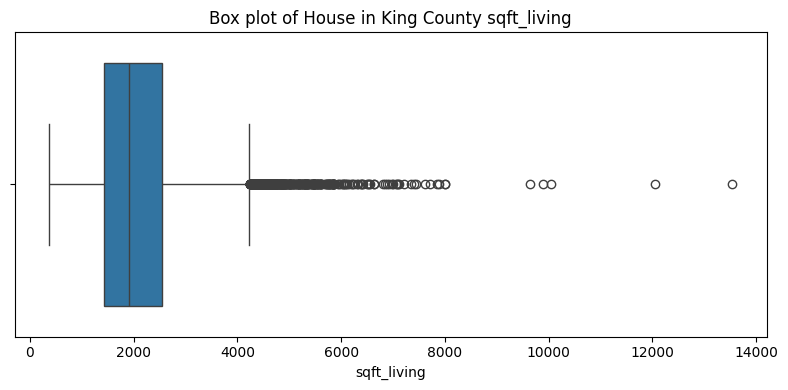

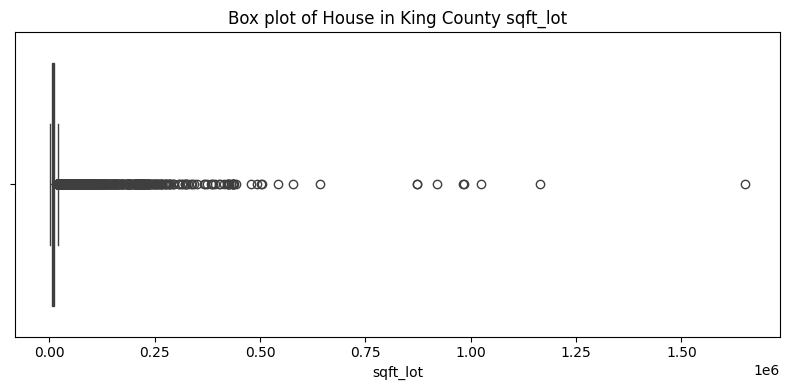

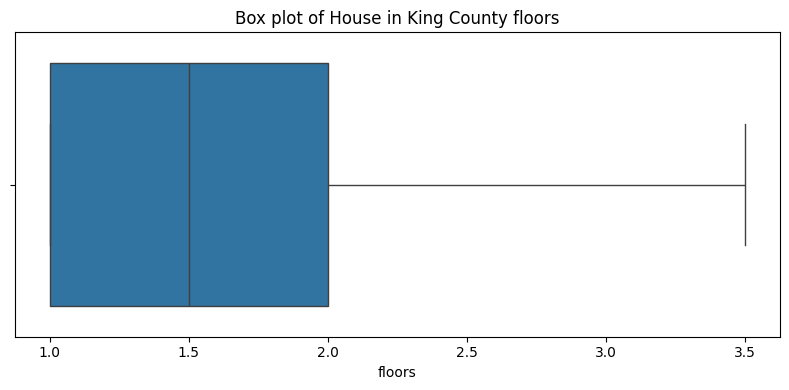

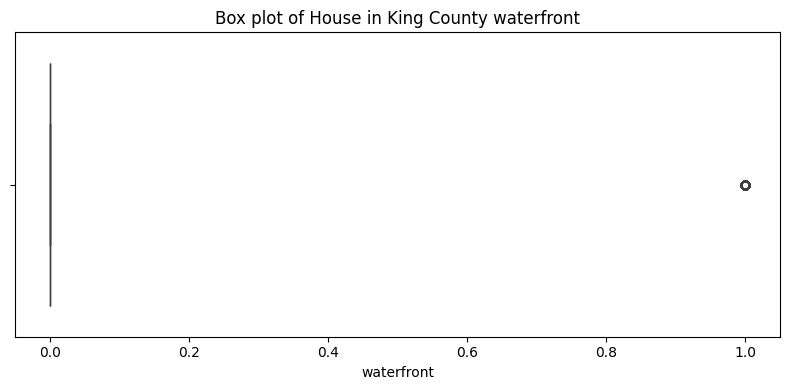

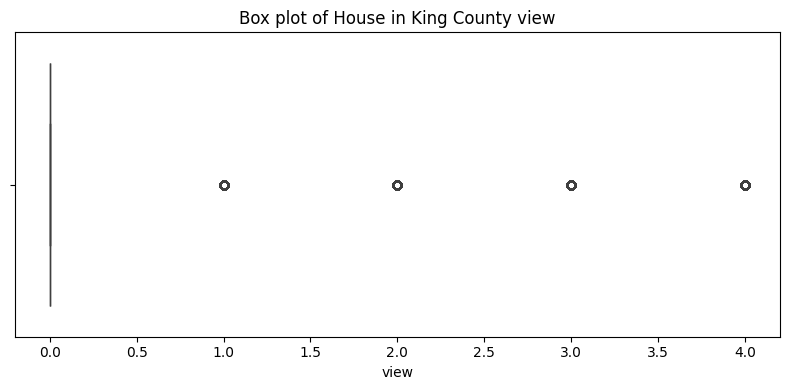

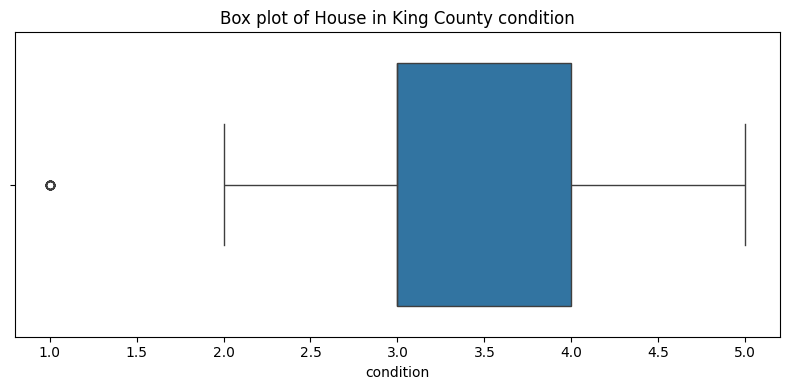

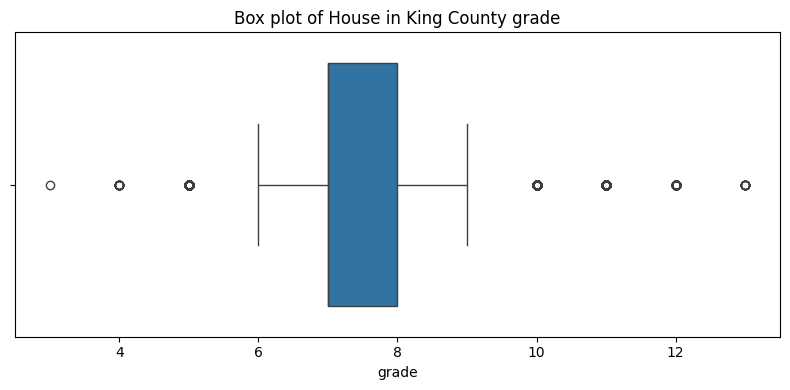

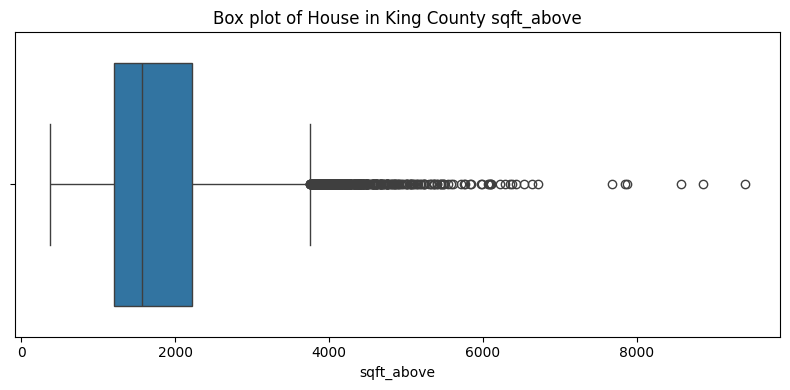

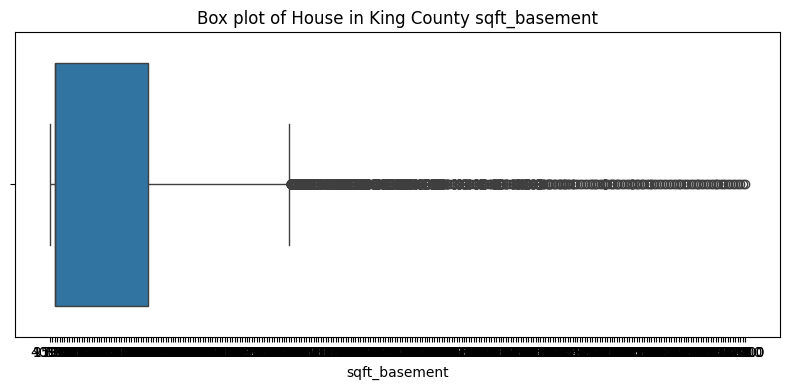

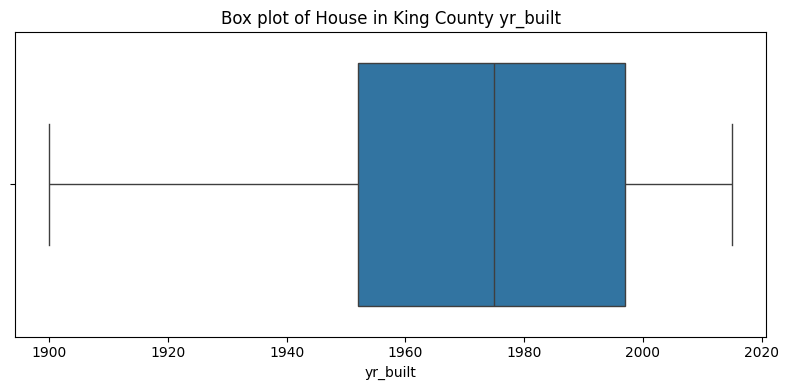

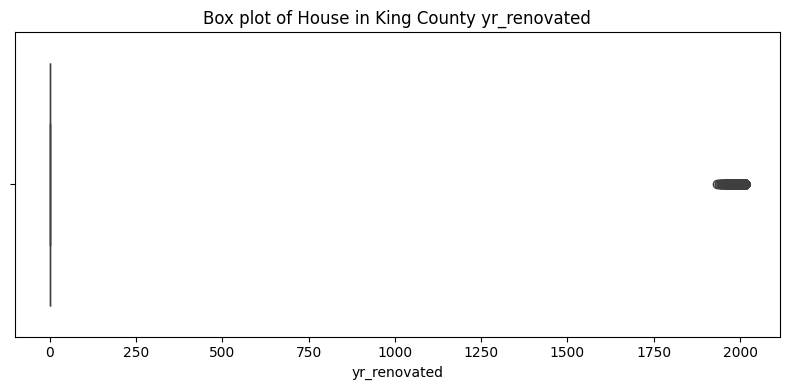

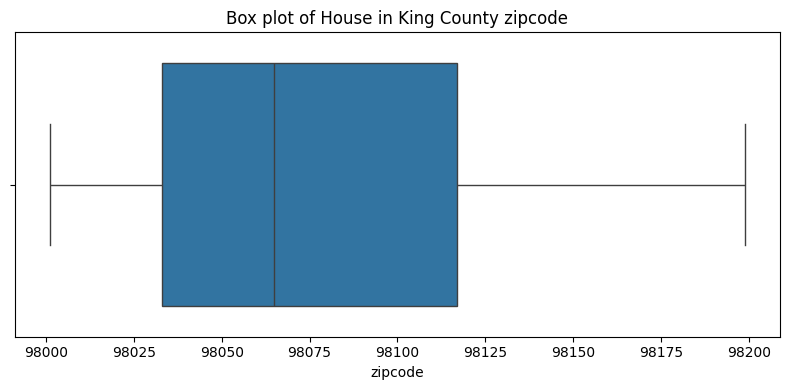

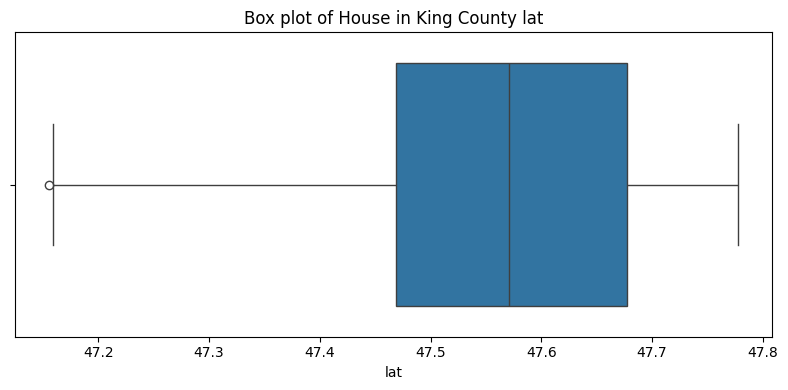

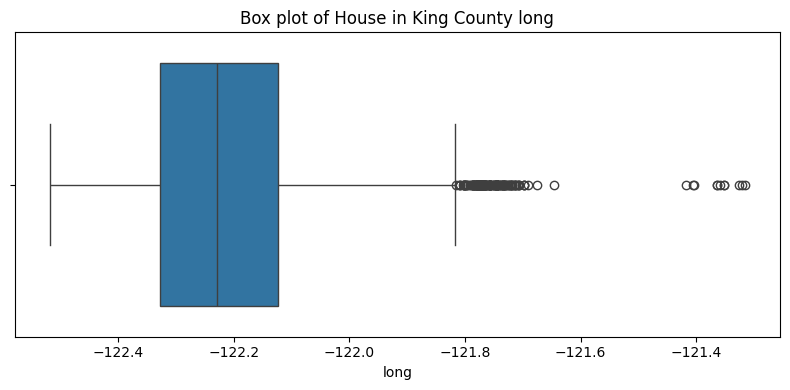

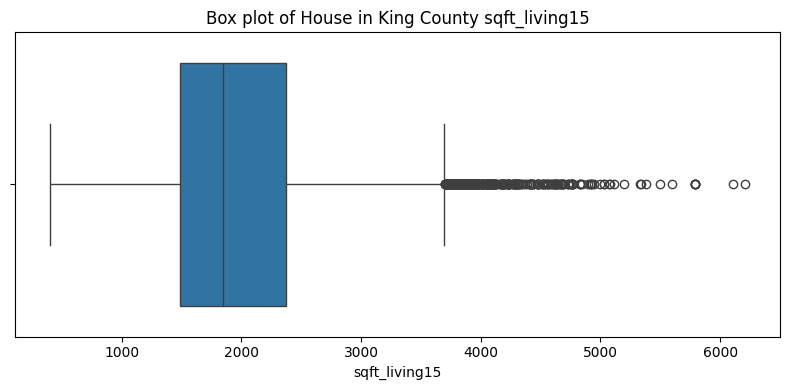

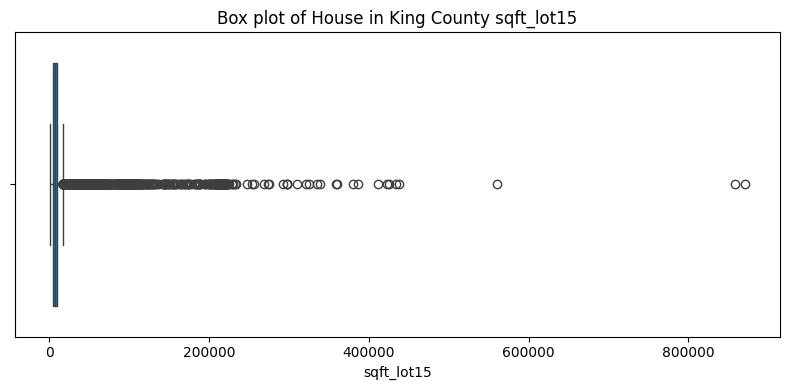

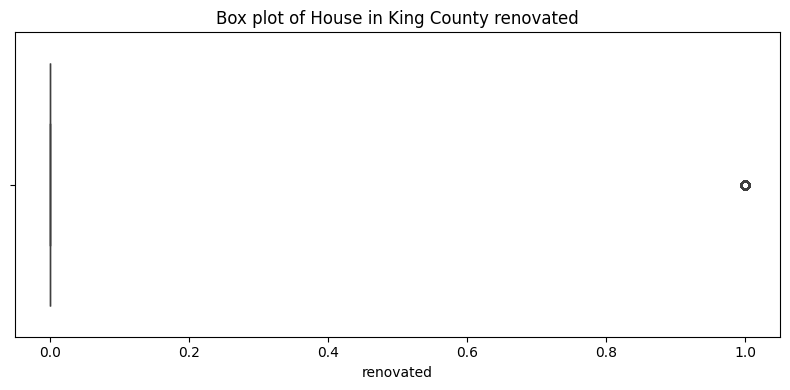

In [42]:
#Using Boxplot to reinspect any outliers after removing them
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of House in King County {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# **Step 5 - Modeling with Linear Regression**

In [43]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initialize the linear regression model
model=LinearRegression()

In [45]:
# Split into training and testing sets (80% train, 20% test)
selected_features = [
    'sqft_living', 'grade', 'bathrooms', 'view', 'waterfront',
    'sqft_above', 'bedrooms', 'lat', 'renovated'
]
zipcode_features = [col for col in df.columns if col.startswith('zip_')]
final_features = selected_features + zipcode_features

X = df[final_features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (12609, 9)
Test set size: (3153, 9)


The dataset has been successfully split into:

Training set: 12,609 samples (80%)

Test set: 3,153 samples (20%)

This is a good balance, allowing the model to learn from a large portion of the data while still preserving enough data for reliable evaluation. With 9 features, the dataset size is sufficient to train a linear regression model effectively without overfitting.

In [46]:
# Train the model on training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance on Test Set:
Mean Squared Error (MSE): 40800163029.98
R² Score: 0.6650


The model explains 66.5% of the variance in house prices on the test set (R² = 0.665), which indicates a moderate predictive power.

However, the high Mean Squared Error (~40.8 billion) suggests the model's predictions can deviate significantly from actual prices — likely due to large variability in house prices or presence of outliers

# **Step 6 - Model Evaluation**

In [47]:
#Use R² Score to evaluate performance
r2 = r2_score(y_test, y_pred)
print(f"R² Score     : {r2:.4f}")

R² Score     : 0.6650


An R² score of 0.6650 means the model explains 66.5% of the variability in house prices based on the selected features.

This indicates the model has a decent level of accuracy, but there's still 33.5% of the variation unexplained, which might be due to missing features, outliers, or non-linear relationships.

In [48]:
#Use RMSE to evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE         : {rmse:,.2f}")

RMSE         : 201,990.50


The Root Mean Squared Error (RMSE) of $201,990.50 means that, on average, the model's price predictions deviate from the actual values by about $202K.

This is a substantial error, suggesting that while the model captures general trends, it's not highly precise — possibly due to:

High price variability in the market

Outliers or extreme values

Missing influential features

In [49]:
from sklearn.metrics import mean_absolute_error

In [50]:
# Use MAE to evaluate performance
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE          : {mae:,.2f}")

MAE          : 133,119.67


The Mean Absolute Error (MAE) of $133,119.67 indicates that, on average, the model's predictions are off by about $133K from the actual house prices.

This is a significant gap, pointing to:

High variability in house prices

Potential outliers or noise in the data

A need for more predictive or refined features

In [ ]:
#Analyze coefficients to interpret feature importance
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

coeff_df.drop(columns='Abs_Coefficient', inplace=True)

# Display the most important features
print("Feature Importance (based on linear regression coefficients):")
print(coeff_df)


Feature Importance (based on linear regression coefficients):
       Feature    Coefficient
7          lat  662899.435135
4   waterfront  619821.483116
8    renovated  128433.933745
1        grade   77297.337327
3         view   66202.940294
6     bedrooms  -26819.490072
2    bathrooms  -16325.039553
0  sqft_living     217.958369
5   sqft_above      -7.807867


The model highlights the top drivers of house price as:

🏞️ Latitude (lat): Strongest positive impact, possibly reflecting location desirability (e.g., proximity to Seattle or waterfronts).

🌊 Waterfront: Adds ~$620K to price, showing its premium value.

🛠️ Renovated: Increases price by ~$128K, confirming that renovations significantly boost property value.

🏗️ Grade and View: Also contribute positively, reflecting build quality and aesthetic appeal.

Negative or low-impact features:

Bedrooms and Bathrooms have small negative coefficients, possibly due to multicollinearity with other size-related features.

Sqft_living has a small positive impact, while sqft_above is nearly neutral.

📈 Takeaway: Location, renovation status, and premium features (waterfront, view, grade) are the most influential on price. Basic attributes like size and room count play a smaller role once these factors are considered.

# **Step 7 - Renovation Impact Analysis**

In [52]:
# Group by the 'renovated' column and calculate average price
avg_price_comparison = df.groupby('renovated')['price'].mean().reset_index()

# Rename columns for clarity
avg_price_comparison.columns = ['Renovated', 'Average Price']

# Convert binary to label for better readability
avg_price_comparison['Renovated'] = avg_price_comparison['Renovated'].map({0: 'Not Renovated', 1: 'Renovated'})

print("Average Prices: Renovated vs. Non-Renovated Houses")
print(avg_price_comparison)

Average Prices: Renovated vs. Non-Renovated Houses
       Renovated  Average Price
0  Not Renovated  531858.488187
1      Renovated  760872.056836


The average price of renovated houses is $760,872, compared to $531,858 for non-renovated houses — a difference of nearly $229,000.

🔍 Takeaway:
Renovations are clearly associated with significantly higher property values, making them a potentially high-return investment for homeowners and a key factor for real estate pricing strategies.

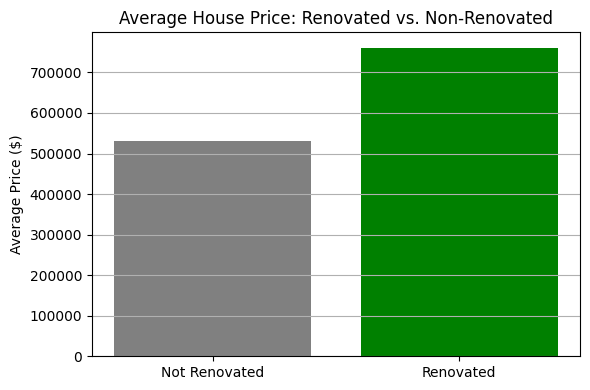

In [53]:
#Compare average prices of renovated vs. non-renovated houses
plt.figure(figsize=(6,4))
plt.bar(avg_price_comparison['Renovated'], avg_price_comparison['Average Price'], color=['gray', 'green'])
plt.title('Average House Price: Renovated vs. Non-Renovated')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


The bar chart clearly shows that renovated homes have much higher average prices compared to non-renovated ones.

Renovated: ~$760K

Not Renovated: ~$532K

🛠️ Conclusion: Renovations add substantial value—over $225K on average—highlighting the strong return potential of property upgrades. This is crucial for sellers, investors, and agents aiming to maximize property value.

The most influential features on house prices are:

Latitude and waterfront location lead with very high positive influence—homes near water or in prime areas are worth significantly more.

Renovation adds over $128K in value, showing strong return potential.

Grade, view, and sqft_living also boost price, reflecting quality and desirability.

Bedrooms and bathrooms surprisingly show a slight negative or weak correlation, suggesting more isn't always better without quality.

🏠 Conclusion: Location and renovation quality matter more than just size or number of rooms in driving home value.

In [57]:
# Get feature importance from model coefficients
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Add absolute value of coefficients to rank by influence
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()

# Sort by absolute importance
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display top 10 most influential features
top_features = coeff_df.head(10)

print("Top 10 Features Most Influencing House Prices:")
print(top_features[['Feature', 'Coefficient']])

Top 10 Features Most Influencing House Prices:
       Feature    Coefficient
7          lat  662899.435135
4   waterfront  619821.483116
8    renovated  128433.933745
1        grade   77297.337327
3         view   66202.940294
6     bedrooms  -26819.490072
2    bathrooms  -16325.039553
0  sqft_living     217.958369
5   sqft_above      -7.807867


The most influential features on house prices are:

Latitude and waterfront location lead with very high positive influence—homes near water or in prime areas are worth significantly more.

Renovation adds over $128K in value, showing strong return potential.

Grade, view, and sqft_living also boost price, reflecting quality and desirability.

Bedrooms and bathrooms surprisingly show a slight negative or weak correlation, suggesting more isn't always better without quality.

🏠 Conclusion: Location and renovation quality matter more than just size or number of rooms in driving home value.

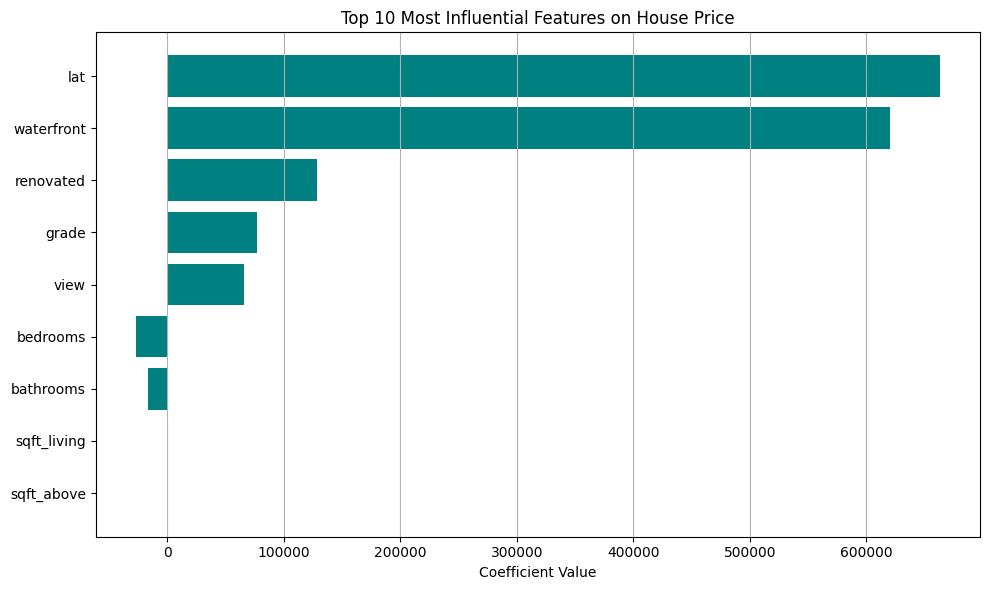

In [58]:
# Optional: plot top 10
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Coefficient'][::-1], color='teal')
plt.title('Top 10 Most Influential Features on House Price')
plt.xlabel('Coefficient Value')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

The bar chart highlights the top features influencing house prices based on a linear regression model:

Latitude and waterfront status are the most influential, adding substantial value — suggesting location is a major pricing factor.

Renovation significantly increases price, confirming its strong return on investment.

Features like grade (construction quality) and view (scenic appeal) also have notable positive impacts.

Meanwhile, bedrooms, bathrooms, and sqft_above show minimal or even negative influence, indicating that quantity doesn’t outweigh quality or location.

✅ Conclusion: Buyers pay a premium for desirable locations and renovated, high-quality homes — not just size or room count.

In [157]:
# Look for 'renovated' or 'yr_renovated' in the features
if 'renovated' in coeff_df['Feature'].values:
    renovation_coef = coeff_df[coeff_df['Feature'] == 'renovated']['Coefficient'].values[0]
    print(f"\n🛠 Renovation Impact Coefficient: {renovation_coef:.2f}")
    if renovation_coef > 0:
        print("→ Renovation is associated with an increase in house price.")
    elif renovation_coef < 0:
        print("→ Renovation is associated with a decrease in house price.")
    else:
        print("→ Renovation has no measurable impact on price.")


🛠 Renovation Impact Coefficient: 128433.93
→ Renovation is associated with an increase in house price.


The output shows a Renovation Impact Coefficient of 128,433.93, which means that, on average, homes that have undergone renovation are valued $128,433.93 higher than similar homes without renovations.

Insight:
Renovation significantly boosts property value, making it a worthwhile investment for homeowners aiming to increase resale price or equity.

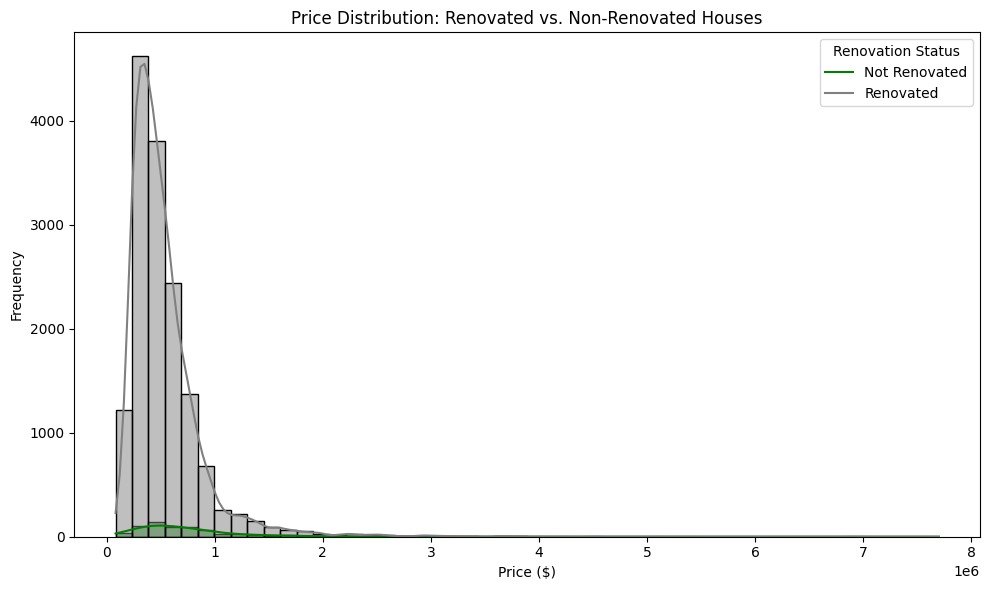

In [161]:
#Visualize price distributions or build separate models to assess the difference.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='renovated', kde=True, palette=['gray', 'green'], bins=50)
plt.title('Price Distribution: Renovated vs. Non-Renovated Houses')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend(title='Renovation Status', labels=['Not Renovated', 'Renovated'])
plt.tight_layout()
plt.show()

The distribution of house prices for both renovated and non-renovated properties is heavily skewed to the right, indicating that most houses fall within a lower price range, with a long tail of more expensive properties. While both distributions peak in a similar lower price bracket, the distribution for renovated houses appears to be slightly shifted towards higher prices and has a longer, though less pronounced, tail of very expensive properties compared to non-renovated houses. This suggests that renovations tend to increase the price, but the fundamental price distribution remains skewed.

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
#Determine if renovated significantly boosts price after controlling for other features.

# Prepare data
X = pd.get_dummies(df.drop('price', axis=1), drop_first=True)
y = df['price']

# Scale and split
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression().fit(X_train, y_train)

# Show renovation impact
coef = pd.Series(model.coef_, index=X.columns)
print("Renovation Effect on Price:", coef['renovated'])

Renovation Effect on Price: 6374.576064880002


Renovations are associated with an average price increase of roughly $6,375. This is an average; individual impact varies, and other factors influence price. The $6,375 represents a correlation, not necessarily a direct causal effect of renovation.

# **Step 8 - Conclusion and Recommendations**

### **Based on the linear regression coefficients and feature importance visualization, the following features have the strongest influence on house prices:**

#### **🔝 Top Influential Features:**

1. **Latitude (lat) — 🌍**
Highest positive influence on price.
Indicates that homes located further north in the region (possibly closer to desirable areas) are more valuable.

2. **Waterfront (waterfront) — 🌊**
Strong positive impact; waterfront properties command significantly higher prices.

3. **Renovated (renovated) — 🛠️**
Renovated homes are priced substantially higher, showing clear added value from renovations.

4. **Grade (grade) — 🏗️**
The construction and design quality grade is closely tied to price increases.

5. **View (view) — 🌅**
Better views lead to higher prices, though the impact is less than the above features.

#### **🔻 Less Influential or Negative Impact:**
1. **Bedrooms and Bathrooms** — Surprisingly, these have mild negative coefficients in the model, likely due to multicollinearity or diminishing returns beyond a certain number.

2. **sqft_living** — Has a small positive impact, though not as strong as expected.

3. **sqft_above** — Minimal or negligible effect.

*Features like location (lat), proximity to water, renovation, and property quality (grade and view) are the most powerful drivers of house price in this dataset. Basic specs like size and room count contribute less than aesthetic, quality, and location-related factors.*

### **Based on the analysis above, renovation has a significant positive impact on house value. Here's a breakdown of the findings:**

#### **🔍 Quantitative Impact of Renovation:**

1.**From Linear Regression Coefficient:**

The coefficient for the renovated feature is approximately +128,434.

✅ Interpretation: After controlling for other features, a renovated house is predicted to be worth $128,434 more than a comparable non-renovated house.

2.**From Average Price Comparison:**

Renovated houses average: $760,872

Non-renovated houses average: $531,858

🟢 Difference: $229,014

✅ This raw difference suggests that renovations add substantial value, even when not controlling for other factors.

3.**Visual Insights:**

Bar charts and scatter plots reinforce this price gap visually — renovated homes cluster at higher price levels.

*Renovating a home can boost its value by at least $128K to over $229K, depending on the context. The actual added value depends on other factors like location, grade, and view, but renovation clearly positions a property in a higher price bracket.*

### **Actionable takeaways based on the impact of renovation on house value:**

#### **🏠 For Homeowners:**
Renovate strategically to boost resale value

Renovations can add over $128K in value, especially in competitive markets.

Focus on high-ROI updates like kitchens, bathrooms, and modern finishes.

Consider renovations before selling

If your home is older or hasn’t been updated, moderate renovations may pay off significantly at resale.

Even minor updates (e.g., painting, fixtures, landscaping) can elevate perceived value.

Know your local market

In areas where renovated homes are in demand, investing in upgrades can help your property stand out and sell faster.

#### **🏡 For Real Estate Agents:**
Use renovation as a pricing strategy

Highlight recent renovations in listings — they justify higher asking prices.

Use renovation data to set comps and position listings competitively.

Advise sellers on smart upgrades

Recommend updates that align with buyer expectations in the area.

Help sellers avoid over-renovating — not all upgrades bring equal value.

Target renovated listings in marketing

Use renovation status in social media, MLS filters, and virtual tours to draw attention.

Create a “Before & After” angle — this storytelling engages buyers and shows transformation value.


*Both homeowners and agents should treat renovation as an investment, not just an aesthetic choice — especially with data showing clear price advantages post-renovation.*